## 機器學習
由資料建立模型，data driven modeling

* 機器學習是關於從資料來建立數學模型，以了解資料特性
* 學習的意義在於由可調整的參數來模擬、觀察數據資料
* 如果建立的模型適合(fit)過去的資料(訓練資料)，模型可用來預測及了解新資料
* 對問題的深入了解是進行機器學習的首要工作

## 機器學習問題分類

### * 監督式學習 (supervised learning)
   - 找出屬性與類別間的關係
   - 分類分析、迴歸分析
     + 如果類別變數為「類別」則為分類
     + 如果類別變數為「連續」則為回歸

### * 非監督式學習 (unsupervised learning)
   - 由資料特性自然分群
     + 找出獨特特性的群
   - 分群演算法、降低維度
     + 找出簡潔的資料表示

## 監督式機器學習方法
* 分類樹 
* 迴歸分析

## 非監督式機器學習方法
* K-means
* 降低維度

## classification問題
classification 問題是在input（屬性資料項)與output(分類標籤)之間建立一個預測模型，根據此一模型可以幫助決策者，面對新一筆資料(屬性特性資料組成)，預測是屬於哪一個類別。例如，可以蒐集電子郵件，分析每一封電子郵件特性，然後預測此一郵件是否為「垃圾郵件」(spam email)。

## regression問題
regression問題是在input(屬性資料項)與output(連續性變數)之間建立一個預測模型，根據此一模型可以預測output值。例如，根據房屋特性，建立預測模型，以便根據要買房子特性預測房價。

## clustering問題
clustering問題是根據資料的特性將資料做自然分群。每一群中的資料具有相關的相似性(similarity)。

## Scikit Learning
* Scikit learing (sklearn)是一個實作機器學習方法論的Python程式庫。
* sklearn是一個簡潔、一致、流暢的API，據擁有完整且有用的使用文件。

## sklearn的資料表示
* 以資料表的形式，每一列(row)代表一筆資料，每一行(column)代表一個屬性
* 特徵矩陣 X[n_sample][n_feature]
  - n_sample: 資料比數
  - n_feature: 屬性欄位數
* 目標陣列 y[n_sample]
  - y 的內容可以是連續的或離散的

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

## supervised learning: Linear Regression
找出特徵值矩陣(feature matrix)與目標陣列(target array)之間的關係

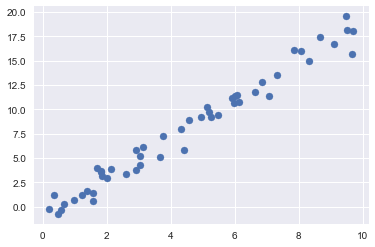

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [22]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.coef_

array([ 1.9776566])

In [24]:
model.intercept_

-0.90331072553111635

y = aX + b , a = 1.9776, b = -0.9033

In [25]:
xfit = np.linspace(-1, 11)

In [29]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

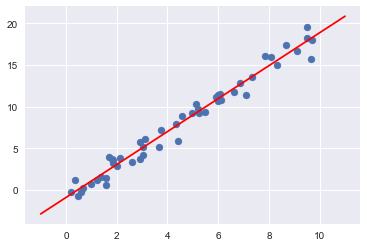

In [31]:
plt.scatter(X, y)
plt.plot(Xfit, yfit, c='red')

## Hyperparameters and Model Validation

1. 選擇模型(linear regression, neural net, SVM...)
2. 決定模型參數
3. 利用訓練資料集(training data set)建立模型(找出模型需要的參數) - fit the model
4. 利用測試資料集(test data set)驗證模型 - good fit to the data
   - 比較預測值(模型產生)及實際值(測試資料集提供)
5. 使用模型預測新資料案例

## cross validation
將資料分成n份，使用其中一份作為測試資料集，另外n-1份作為訓練資料集，針對每一份資料執行模型建立與模型驗證，累計平均每一次過程的驗證效能參數，藉此找出較佳的模型參數。
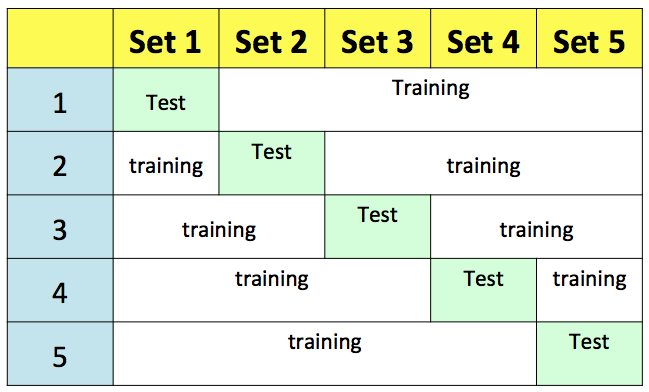

## model underfit
所建立的模型複雜度不足以解釋資料的特徵性，因此產生高的偏差值。

## model overfit
所建立的模型複雜度足以解釋訓練資料的特徵性，可以精確地描述訓練資料。太注重訓練資料的模型複雜度而忽略測試資料(新資料)的雜訊，以致於產生較高的變異性。

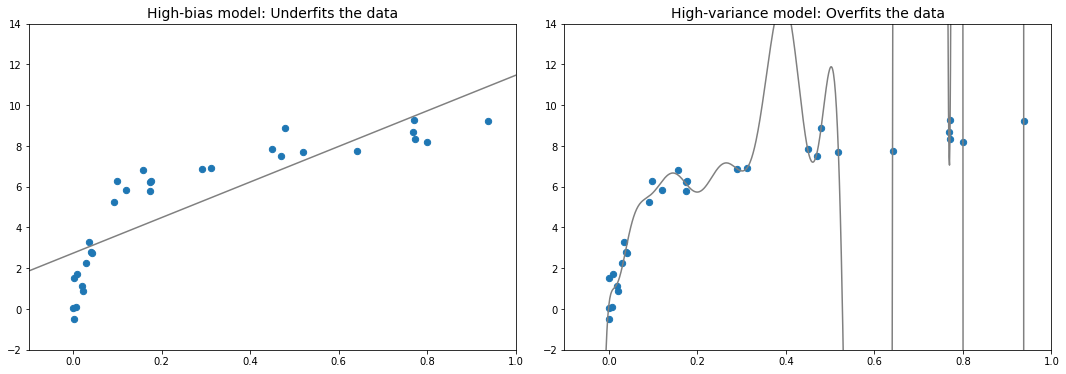

In [36]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

#fig.savefig('figures/05.03-bias-variance.png')

## Coefficient of Determination $R^2$
預測值是否逼近目標值的平均

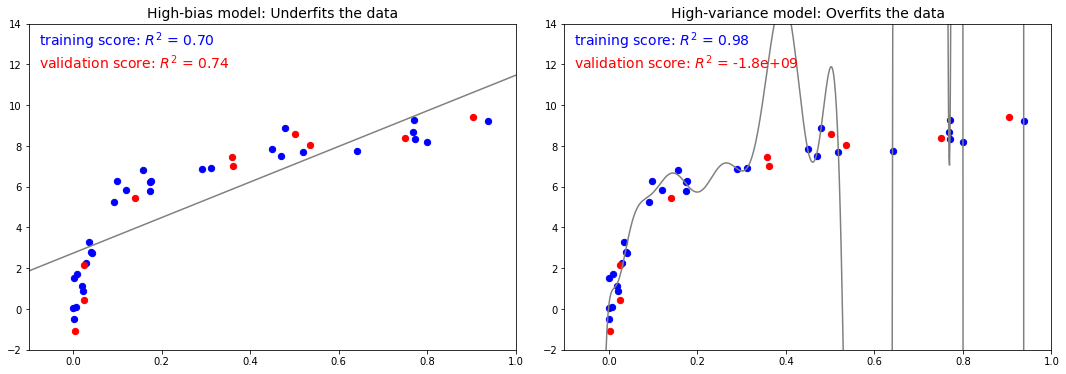

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')

#fig.savefig('figures/05.03-bias-variance-2.png')

* $R^2$ = 1, yes
* $R^2$ = 0, 使用平均值較佳